# Primera parte: Introducción a las redes neuronales con Keras

En esta primera parte, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

Using TensorFlow backend.


Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [ ]:
#Tenemos 6000 imagenes de 28x28 pixeles cada una en el conjunto de ejemplos de entrenamiento (x_train). 
print(x_train.shape)
#Tenemos 1000 imagenes de 28x28 pixeles cada una en el conjunto de ejemplos de test (x_test)
print(x_test.shape)


#Tenemos 6000 resultados en el conjunto de etiquetas de entrenamiento (y_tain)
print(y_train.shape)
#Tenemos 1000 resultados en el conjunto de etiquetas de validacion(y_test)
print(y_test.shape)

#Cada imagen es de 28 x 28 pixels en escala de grises
print(x_test[0].shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
(28, 28)


Tenemos 6000 imagenes de 28x28 pixeles cada una en el conjunto de ejemplos de entrenamiento (x_train). 
Tenemos 1000 imagenes de 28x28 pixeles cada una en el conjunto de ejemplos de test (x_test).
Tenemos 6000 resultados en el conjunto de etiquetas de entrenamiento (y_tain).
Tenemos 1000 resultados en el conjunto de etiquetas de validacion(y_test).

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [ ]:
#Cada imagen es de 28 x 28 pixels viene representada por una matriz de 28x 28. Cada pixel toma una posicion de la matriz
#Cada pixel toma valores entre 0 y 1. Blanco y negro. Toma valores en la escala de grises.
print(x_train[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [ ]:
#La salida se corresponde  con una de las 10 clases posibles del clasificador
# 0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot
print(y_train[0])

9


Viendo la información del dataset vemos cada imagen es de 28x 28 y toma valores en la escala de grises. Por otro lado, en el conjunto de etiquetas asociadas a la imagen para realizar este aprendizaje supervisado, disponemos de 10 clases posibles que vienen representadas por un numero del 0 al 9. Se trata de un problema de clasificación. La salida puede tomar una de estas 10 clases( 0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot)

Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [ ]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

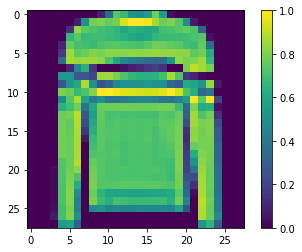

2


In [ ]:
visualize_example(x_train[5])

#Es una clase 2 -Pullover 
print(y_train[5]) 

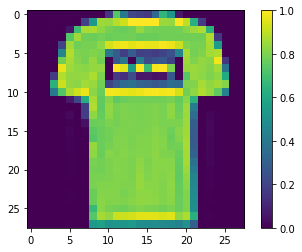

0


In [ ]:
visualize_example(x_train[1])
# Es una clase 0 T-shirt/to
print(y_train[1])

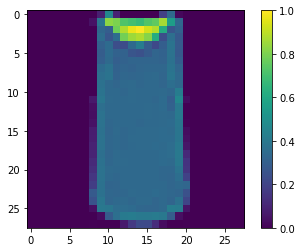

0


In [ ]:
visualize_example(x_train[2])
# Es una 0 T-shirt/to
print(y_train[2])

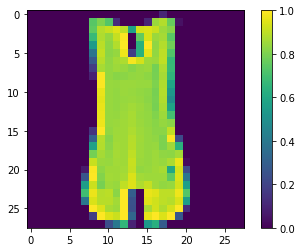

0


In [ ]:
visualize_example(x_train[4])
# Es una 0 T-shirt/to
print(y_train[4])


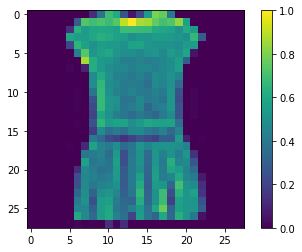

3


In [ ]:
visualize_example(x_train[3])
# Es una 3 Dress
print(y_train[3])

Vemos una serie de ejemplos de imagenes del conjunto de entramiento que tienen la etiqueta 0 correspondiente a la clase Tshit. A priori resulta díficil imaginarse un patrón, a simple vista,con las posibles representaciones intermedias  que aprenderá la red para diferenciaras de otras clases como dress por ejemplo.


## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(3.5 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [ ]:
### Preparamos los datos para la red ###
num_classes = 10
batch_size = 64
epochs = 20

#Convertimos los datos de entrada (matriz de 28 x28) en un vector de una dimesión 784 que contega todos los pixeles 
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

#Nos aseguramos que son datos de tipo float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Convertimos las clases de salida en vectores de una dimesión con la clase equivalente activada
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [ ]:
### Definimos la arquitectura de la red según el enunciado ###
model = Sequential()
model.add(Dense(128, activation='sigmoid', name="hidden_layer1", input_shape=(784,)))
model.add(Dense(64, activation='sigmoid',  name="hidden_layer2"))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 128)               100480    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Añadimos al modelo la funcion de perdida, el optimizador y las metricas que queremos ver en cada batch
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', 
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
#Entrenamos la rede
history = model.fit(x_train, y_train,
                    batch_size= batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 25us/step - loss: 1.1833 - accuracy: 0.6217 - val_loss: 0.7274 - val_accuracy: 0.7347
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.6270 - accuracy: 0.7711 - val_loss: 0.5947 - val_accuracy: 0.7817
Epoch 3/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.5344 - accuracy: 0.8076 - val_loss: 0.5345 - val_accuracy: 0.8080
Epoch 4/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.4854 - accuracy: 0.8274 - val_loss: 0.4982 - val_accuracy: 0.8240
Epoch 5/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.4564 - accuracy: 0.8373 - val_loss: 0.4754 - val_accuracy: 0.8296
Epoch 6/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.4370 - accuracy: 0.8433 - val_loss: 0.4646 - val_accuracy: 0.8342
Epoch 7/20
60000/60000 [==============================] - 1s 18us/st

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(0.5 puntos)***. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [ ]:
score  = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.3929219949960709
Test accuracy: 0.8586999773979187


**Pregunta 3.2 *(0.5 puntos)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

In [ ]:
preds = model.predict(x_test)

In [ ]:
print(type(preds))
print(preds[0])
print(y_test[0])


<class 'numpy.ndarray'>
[1.3133148e-05 3.9423835e-06 5.0586779e-05 1.7271885e-04 2.2436361e-05
 4.2039625e-02 1.5798474e-04 4.1852571e-02 2.7868100e-03 9.1290021e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Si utilizamos la función predict con el conjunto de datos de test nos devuelve un array que contiene a su vez un array de 10 posiciones  por cada elemento. Representa las propababilidades calculadas por la red sobre cada posible clase. Si observamos la imagen del conjunto de test de prueba, la clase verdadera es la 9 y se corresponde con la posición que la red ha calculado que tienen más probabilidad de pertenencia a ser la clase 9.

In [ ]:
#Para monitorizar la funcion de coste dibujaremos una grafica a partir de los datos obtenidos del entrenamiento.
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


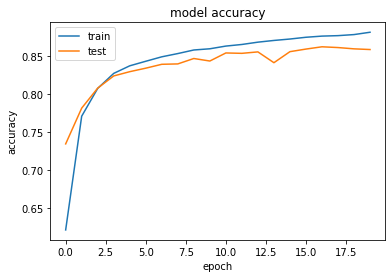

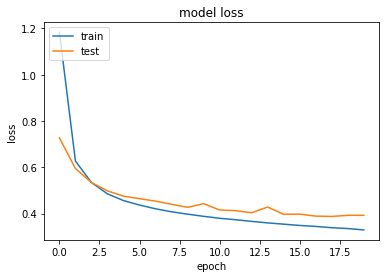

In [ ]:
# Grafica para comparar la metrica  accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#  Grafica para comparar la funcion de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

La train loss y la test loss convergen hacia el mismo sitio. No parece haber overfitting. Y el learning rate elegido parece correcto también.